In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud

In [27]:
df = pd.read_csv("twitter_training.csv", header=None)
df.columns = ['ID', 'Entity', 'Sentiment', 'Content']
df.dropna(subset=['Content'], inplace=True)

In [28]:
#Preprocess the Data
import re

def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)     # remove mentions
    text = re.sub(r"#\w+", "", text)     # remove hashtags
    text = re.sub(r"[^A-Za-z\s]", "", text)  # remove special characters
    text = text.lower()
    return text


df['Clean_Content'] = df['Content'].fillna('').apply(clean_text)

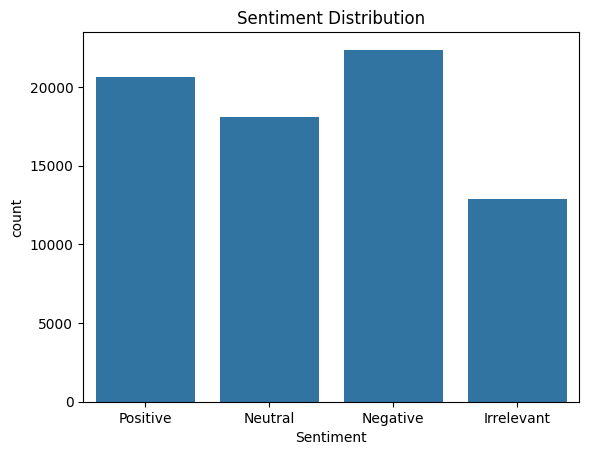

In [29]:
#Visualize Sentiment Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Sentiment']) # e.g., Positive=2, Negative=0, Neutral=1

In [31]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Clean_Content'])
y = df['Label']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.69      0.50      0.58      2696
    Negative       0.70      0.78      0.74      4380
     Neutral       0.64      0.62      0.63      3605
    Positive       0.68      0.74      0.71      4119

    accuracy                           0.68     14800
   macro avg       0.68      0.66      0.66     14800
weighted avg       0.68      0.68      0.68     14800

Accuracy Score: 0.6794594594594595
